C:\Users\User\AppData\Local\Temp\ipykernel_23408\209743168.py:45: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(churn_text, font=title_font)
C:\Users\User\AppData\Local\Temp\ipykernel_23408\209743168.py:50: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  info_text_width, info_text_height = draw.textsize(customer_info_text, font=info_font)
C:\Users\User\AppData\Local\Temp\ipykernel_23408\209743168.py:71: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_y += info_font.getsize(line)[1] + 20  # Increase vertical spacing between lines
C:\Users\User\AppData\Local\Temp\ipykernel_23408\209743168.py:80: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlengt

Churn report image created successfully.


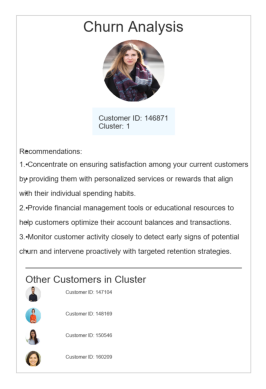

In [15]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def create_churn_image(customer_id, cluster, recommendations, friend_space_text="", image_path=""):
    # Define image dimensions and colors
    image_width = 800
    image_height = 1200
    background_color = (255, 255, 255)  # White background
    text_color = (50, 50, 50)  # Dark gray text color
    accent_color = (239, 249, 255)  # Light blue for highlighting (similar to app design)
    boundary_color = (200, 200, 200)  # Boundary line color (light gray)

    # Create a new image with white background
    image = Image.new("RGB", (image_width, image_height), background_color)
    draw = ImageDraw.Draw(image)

    # Draw boundary line around the content area
    boundary_padding = 20
    draw.rectangle(
        [(boundary_padding, boundary_padding),
         (image_width - boundary_padding, image_height - boundary_padding)],
        outline=boundary_color,
        width=2
    )

    # Load and paste the image from local file path (if provided)
    if image_path:
        try:
            img = Image.open(image_path)
            img = img.resize((200, 200))  # Resize image to fit into circle
            mask = Image.new("L", img.size, 0)
            draw_mask = ImageDraw.Draw(mask)
            draw_mask.ellipse((0, 0, img.size[0], img.size[1]), fill=255)
            image.paste(img, ((image_width - img.size[0]) // 2, 100), mask=mask)
        except Exception as e:
            print(f"Error loading image: {e}")

    # Use professional font for rendering text
    title_font = ImageFont.truetype("arial.ttf", 48)  # Title font
    info_font = ImageFont.truetype("arial.ttf", 24)  # Info font
    small_font = ImageFont.truetype("arial.ttf", 16)  # Small font for customer IDs

    # Draw title "Churn Analysis" centered at the top
    churn_text = "Churn Analysis"
    text_width, text_height = draw.textsize(churn_text, font=title_font)
    draw.text(((image_width - text_width) // 2, 30), churn_text, fill=text_color, font=title_font)

    # Draw customer ID and cluster information with styled box
    customer_info_text = f"Customer ID: {customer_id}\nCluster: {cluster}"
    info_text_width, info_text_height = draw.textsize(customer_info_text, font=info_font)
    info_box_width = info_text_width + 40  # Add padding
    info_box_height = info_text_height + 40  # Add padding
    info_box_x = (image_width - info_box_width) // 2
    info_box_y = 320

    # Draw styled box for customer info
    draw.rectangle([(info_box_x, info_box_y), (info_box_x + info_box_width, info_box_y + info_box_height)],
                   fill=accent_color, outline=None)

    # Draw customer info text within the box
    draw.text((info_box_x + 20, info_box_y + 20), customer_info_text, fill=text_color, font=info_font)

    # Draw recommendations section with bullet points
    recommendations_text = "Recommendations:\n" + recommendations.strip()
    text_y = info_box_y + info_box_height + 40
    bullet_radius = 4
    bullet_indent = 30
    for line in recommendations_text.split("\n"):
        draw.text((50, text_y), "•", fill=text_color, font=info_font)
        draw.text((bullet_indent, text_y), line, fill=text_color, font=info_font)
        text_y += info_font.getsize(line)[1] + 20  # Increase vertical spacing between lines

    # Draw line separator after recommendations
    line_y = text_y + 20  # Reduce the distance from text to line
    draw.line([(50, line_y), (image_width - 50, line_y)], fill=text_color, width=2)

    # Draw title for additional customer IDs
    more_customers_title = "Other Customers in Cluster"
    more_customers_title_font = ImageFont.truetype("arial.ttf", 32)
    more_customers_title_width, _ = draw.textsize(more_customers_title, font=more_customers_title_font)
    draw.text((50, line_y + 20),  # Reduce the distance from line to title
              more_customers_title, fill=text_color, font=more_customers_title_font)

    # Sample other customer IDs and images
    other_customers = [
        ("147104", "C:/Users/User/Downloads/image2.jpg"),
        ("148169", "C:/Users/User/Downloads/image 3.jpg"),
        ("150546", "C:/Users/User/Downloads/image 4.jpg"),
        ("160209", "C:/Users/User/Downloads/image 5.jpg")
    ]

    # Display other customers in circular frames on the left side
    max_img_size = 50 # Maximum size for circular images
    customer_list_start_y = line_y + 60  # Adjust the spacing from title to customer list
    customer_list_spacing = 20
    for idx, (cust_id, cust_image_path) in enumerate(other_customers):
        try:
            cust_img = Image.open(cust_image_path)
            cust_img = cust_img.resize((max_img_size, max_img_size))  # Resize customer image
            mask = Image.new("L", (max_img_size, max_img_size), 0)
            draw_mask = ImageDraw.Draw(mask)
            draw_mask.ellipse((0, 0, max_img_size, max_img_size), fill=255)
            image.paste(cust_img, (50, customer_list_start_y + idx * (max_img_size + customer_list_spacing)), mask=mask)
            draw.text((180, customer_list_start_y + idx * (max_img_size + customer_list_spacing) + 10),
                      f"Customer ID: {cust_id}", fill=text_color, font=small_font)
        except Exception as e:
            print(f"Error loading customer image for ID {cust_id}: {e}")

    # Save the image
    image.save("churn_report.png")
    print("Churn report image created successfully.")

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axes
    plt.show()

# Example usage:
customer_id = "146871"
cluster = 1
recommendations = """
1. Concentrate on ensuring satisfaction among your current customers 
by providing them with personalized services or rewards that align 
with their individual spending habits.
2. Provide financial management tools or educational resources to 
help customers optimize their account balances and transactions.
3. Monitor customer activity closely to detect early signs of potential 
churn and intervene proactively with targeted retention strategies.
"""

# Specify the local image path (replace with your image file path)
image_path = "C:/Users/User/Downloads/image1.jpg"

# Call the function with the provided customer details and image path
create_churn_image(customer_id, cluster, recommendations, image_path=image_path)